In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

# Download this stuff first from the website. Make sure the 
# text file is located in the same directory as your notebook.
# * en   - energy;
# * f    - cross-section
# * f_sd - cross-section std dev
en, f, f_sd = np.loadtxt("data_ch6_resonance.txt")

def breit_wigner(e, param_vec):
    # Unpack the parameters first, because some optimizers
    # expects or returns the parameters as a vector (1D array)
    e_center, gamma, strength = param_vec
    denom = ((e - e_center)**2) + ((gamma**2)/4)
    return strength/denom

def gauss_model(e, param_vec):
    e_center, gamma, strength = param_vec
    expon = ((e - e_center)**2)/(2*(gamma**2))
    return strength*np.exp(-expon)

# Note the lambda function, and check the documentation for 
# `optimize.curve_fit` as to why doing this is necessary. 
popt, pcov = optimize.curve_fit(lambda x, a, b, c: breit_wigner(x, [a,b,c]), en, f)
print(f"BW dist got: {popt}")

# Use the normal distribution as a "null model" to compare
# if the Breit-Wigner distribution really is the appropriate model. 
popt_null, pcov_null = optimize.curve_fit(lambda x, a, b, c: gauss_model(x, [a,b,c]), en, f)
print(f"Null (Gauss) got: {popt_null}")

BW dist got: [2.50004406 0.21029215 0.03537861]
Null (Gauss) got: [2.49991854 0.11729828 2.79446186]


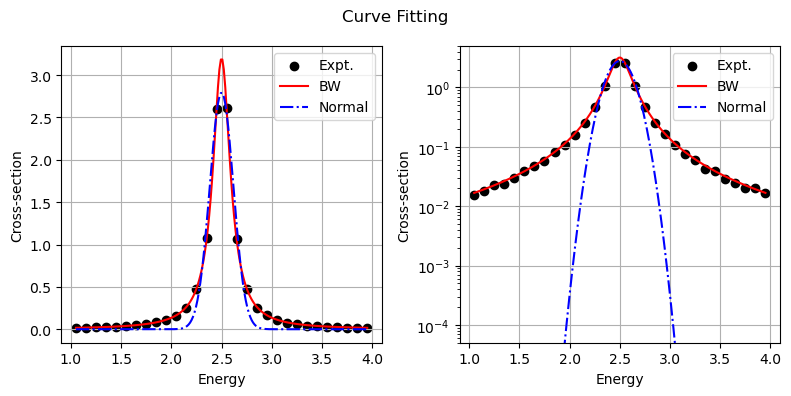

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

e_span = np.linspace(min(en), max(en), 200)

for ax in axs:
    ax.scatter(en, f, color='black', label='Expt.')
    ax.set(xlabel="Energy", ylabel="Cross-section")
    ax.plot(e_span, breit_wigner(e_span, popt), "r-", label="BW")
    ax.plot(e_span, gauss_model(e_span, popt_null), "b-.", label="Normal")
    ax.legend()
    ax.grid(True)

lax, rax = axs
rax.set_yscale("log")
rax.set_ylim(5e-5, 5e-0)
plt.suptitle("Curve Fitting")
plt.savefig("Curve fit.png")
fig.tight_layout()

For BW:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 81.41787606096678
             x: [ 2.500e+00  2.062e-01  3.438e-02]
           nit: 88
          nfev: 161
 final_simplex: (array([[ 2.500e+00,  2.062e-01,  3.438e-02],
                       [ 2.500e+00,  2.062e-01,  3.438e-02],
                       [ 2.500e+00,  2.062e-01,  3.439e-02],
                       [ 2.500e+00,  2.062e-01,  3.438e-02]]), array([ 8.142e+01,  8.142e+01,  8.142e+01,  8.142e+01]))
For Normal:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 81.41787606096678
             x: [ 2.500e+00  2.062e-01  3.438e-02]
           nit: 88
          nfev: 161
 final_simplex: (array([[ 2.500e+00,  2.062e-01,  3.438e-02],
                       [ 2.500e+00,  2.062e-01,  3.438e-02],
                       [ 2.500e+00,  2.062e-01,  3.439e-02],
                       [ 2.500e+00,  2.062e-01,  3.438e-02

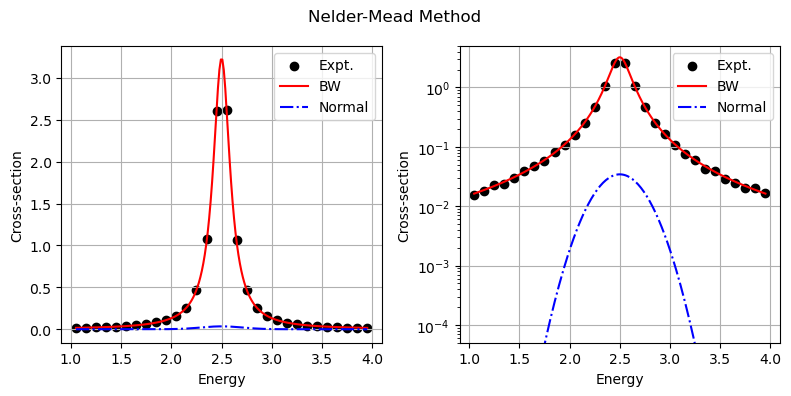

In [4]:
# We need to define the chi-squared function for the dataset. 
# Take note that x/y_data and sigma_vals can be evaluated as arrays.
# The function is essentially R^3 -> R, where the 3 is the number
# of parameters involved, NOT the number of columns plugged in.
def breit_wigner_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - breit_wigner(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

# Again, recast the function. The minimizer expects the parameter
# vector as the only argument of the function.
recast_func = lambda p: breit_wigner_chi(en, f, f_sd, p)
min_result = optimize.minimize(recast_func, x0=[2.5,0.1,0.1], method="Nelder-Mead")
print(f"For BW: {min_result}")


def gauss_model_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - gauss_model(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

recast_func_g = lambda p: gauss_model_chi(en, f, f_sd, p)
min_result_g = optimize.minimize(recast_func, x0=[2.5,0.1,0.1], method="Nelder-Mead")
print(f"For Normal: {min_result_g}")


## Let's plot the same stuff again

fig, axs = plt.subplots(1, 2, figsize=(8,4))
e_span = np.linspace(min(en), max(en), 200)

for ax in axs:
    ax.scatter(en, f, color='black', label='Expt.')
    ax.set(xlabel="Energy", ylabel="Cross-section")
    ax.plot(e_span, breit_wigner(e_span, min_result.x), "r-", label="BW")
    ax.plot(e_span, gauss_model(e_span, min_result_g.x), "b-.", label="Normal")
    ax.legend()
    ax.grid(True)

lax, rax = axs
rax.set_yscale("log")
rax.set_ylim(5e-5, 5e-0)
plt.suptitle("Nelder-Mead Method")
plt.savefig("Nelder Mead.png")
fig.tight_layout()

For BW:      message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 8.142e+01]
           x: [ 2.500e+00  2.062e-01  3.438e-02]
        cost: 3314.4357166391474
         jac: [[-4.162e-01 -1.025e+01 -2.163e+00]]
        grad: [-3.389e+01 -8.345e+02 -1.761e+02]
  optimality: 834.5019166689469
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 243
        njev: 233
For Normal:      message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 8.142e+01]
           x: [ 2.500e+00  2.062e-01  3.438e-02]
        cost: 3314.4357166391474
         jac: [[-4.162e-01 -1.025e+01 -2.163e+00]]
        grad: [-3.389e+01 -8.345e+02 -1.761e+02]
  optimality: 834.5019166689469
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 243
        njev: 233


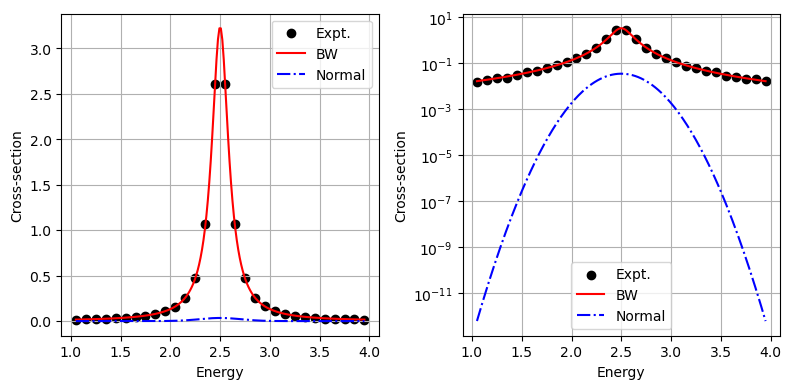

In [5]:
## The least-squares optimizer in scipy uses Levenberg-Marquardt.

def breit_wigner_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - breit_wigner(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

recast_func = lambda p: breit_wigner_chi(en, f, f_sd, p)
min_result = optimize.least_squares(recast_func, x0=[2.5,0.1,0.1])
print(f"For BW: {min_result}")


def gauss_model_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - gauss_model(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

recast_func_g = lambda p: gauss_model_chi(en, f, f_sd, p)
min_result_g = optimize.least_squares(recast_func, x0=[2.5,0.1,0.1])
print(f"For Normal: {min_result_g}")


## Let's plot the same stuff again

fig, axs = plt.subplots(1, 2, figsize=(8,4))
e_span = np.linspace(min(en), max(en), 200)

for ax in axs:
    ax.scatter(en, f, color='black', label='Expt.')
    ax.set(xlabel="Energy", ylabel="Cross-section")
    ax.plot(e_span, breit_wigner(e_span, min_result.x), "r-", label="BW")
    ax.plot(e_span, gauss_model(e_span, min_result_g.x), "b-.", label="Normal")
    ax.legend()
    ax.grid(True)

lax, rax = axs
rax.set_yscale("log")
fig.tight_layout()

In [6]:
# Implement gradient descent as listed in Ch. 5.6 of Gezerlis (see Code 5.7), 
# but the scalar function is the cost function (chi-squared) as described 
# above.

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
en, f, f_sd = np.loadtxt("data_ch6_resonance.txt")

#descent.py
from jacobi import termcrit
import numpy as np

# Breit-Wigner model
def breit_wigner(e, param_vec):
    e_center, gamma, strength = param_vec
    denom = ((e - e_center)**2) + ((gamma**2)/4)
    return strength / denom

# Chi-squared cost function
def breit_wigner_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - breit_wigner(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2)

#replace scalar function with cost function chi-squared
# def new_phi(x_data, y_data, sigma_vals):
#     def phi(xs):
#         return breit_wigner_chi(x_data, y_data, sigma_vals, xs)
#     return phi

phi = lambda xs : breit_wigner_chi(en, f, f_sd, xs)

#gradient
def gradient(phi, xs, h=1.e-6):
    n = xs.size
    grad = np.zeros(n)
    phi0 = phi(xs)
    
    for i in range(n):
        x_perturbed = xs.copy()
        x_perturbed[i] += h
        grad[i] = (phi(x_perturbed) - phi0) / h
    
    return grad

#descent
def descent(phi,gradient,xolds,gamma=0.15,kmax=200,tol=1.e-12):
    for k in range(1,kmax):
        xnews = xolds - gamma*gradient(phi,xolds)

        err = termcrit(xolds,xnews)
        if err < tol:
            break

        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews

if __name__ == '__main__':
    xolds = np.array([2.5,0, 0])
    xnews = descent(phi, gradient, xolds)
    print(xnews)

[-7.53967395e+22  2.14423390e+18 -4.05924741e+15]


/home/jupyter-adhernandez3/ap155_project_euler/jacobi.py:8: RuntimeWarning: invalid value encountered in divide
  errs = np.abs((xnews - xolds)/xnews)


## Gaussian

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
en, f, f_sd = np.loadtxt("data_ch6_resonance.txt")

#descent.py
from jacobi import termcrit
import numpy as np

# Breit-Wigner model
def gauss_model(e, param_vec):
    e_center, gamma, strength = param_vec
    expon = ((e - e_center)**2)/(2*(gamma**2))
    return strength*np.exp(-expon)

# Chi-squared cost function
def gauss_model_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - gauss_model(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2)

phi = lambda xs : gauss_model_chi(en, f, f_sd, xs)

#gradient
def gradient(phi, xs, h=1.e-6):
    n = xs.size
    grad = np.zeros(n)
    phi0 = phi(xs)
    
    for i in range(n):
        x_perturbed = xs.copy()
        x_perturbed[i] += h
        grad[i] = (phi(x_perturbed) - phi0) / h
    
    return grad

#descent
def descent(phi,gradient,xolds,gamma=0.15,kmax=200,tol=1.e-8):
    for k in range(1,kmax):
        xnews = xolds - gamma*gradient(phi,xolds)

        err = termcrit(xolds,xnews)
        if err < tol:
            break

        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews

if __name__ == '__main__':
    xolds = np.array([2.5,0.1, 0.1])
    xnews = descent(phi, gradient, xolds)
    print(xnews)

[ 4.04475103e+08 -2.76089101e+06 -5.84780863e+10]


For BW:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 81.4178658890358
       x: [ 2.500e+00  2.062e-01  3.439e-02]
     nit: 7
   direc: [[ 1.000e+00  0.000e+00  0.000e+00]
           [-2.573e-03 -1.043e-01 -1.637e-02]
           [ 1.142e-04 -7.005e-04 -5.950e-04]]
    nfev: 253
For Normal:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 81.4178658890358
       x: [ 2.500e+00  2.062e-01  3.439e-02]
     nit: 7
   direc: [[ 1.000e+00  0.000e+00  0.000e+00]
           [-2.573e-03 -1.043e-01 -1.637e-02]
           [ 1.142e-04 -7.005e-04 -5.950e-04]]
    nfev: 253


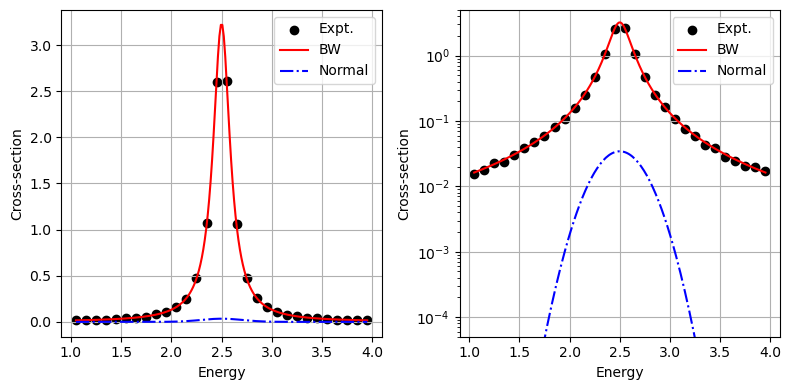

In [8]:
def breit_wigner_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - breit_wigner(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

# Again, recast the function. The minimizer expects the parameter
# vector as the only argument of the function.
recast_func = lambda p: breit_wigner_chi(en, f, f_sd, p)
min_result = optimize.minimize(recast_func, x0=[2.5,0.1,0.1], method="Powell")
print(f"For BW: {min_result}")


def gauss_model_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - gauss_model(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

recast_func_g = lambda p: gauss_model_chi(en, f, f_sd, p)
min_result_g = optimize.minimize(recast_func, x0=[2.5,0.1,0.1], method="Powell")
print(f"For Normal: {min_result_g}")


## Let's plot the same stuff again

fig, axs = plt.subplots(1, 2, figsize=(8,4))
e_span = np.linspace(min(en), max(en), 200)

for ax in axs:
    ax.scatter(en, f, color='black', label='Expt.')
    ax.set(xlabel="Energy", ylabel="Cross-section")
    ax.plot(e_span, breit_wigner(e_span, min_result.x), "r-", label="BW")
    ax.plot(e_span, gauss_model(e_span, min_result_g.x), "b-.", label="Normal")
    ax.legend()
    ax.grid(True)

lax, rax = axs
rax.set_yscale("log")
rax.set_ylim(5e-5, 5e-0)
plt.savefig("Powell.png")
fig.tight_layout()

For BW:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 81.4178658890358
       x: [ 2.500e+00  2.062e-01  3.439e-02]
     nit: 7
   direc: [[ 1.000e+00  0.000e+00  0.000e+00]
           [-2.573e-03 -1.043e-01 -1.637e-02]
           [ 1.142e-04 -7.005e-04 -5.950e-04]]
    nfev: 253
For Normal:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 81.4178658890358
       x: [ 2.500e+00  2.062e-01  3.439e-02]
     nit: 7
   direc: [[ 1.000e+00  0.000e+00  0.000e+00]
           [-2.573e-03 -1.043e-01 -1.637e-02]
           [ 1.142e-04 -7.005e-04 -5.950e-04]]
    nfev: 253


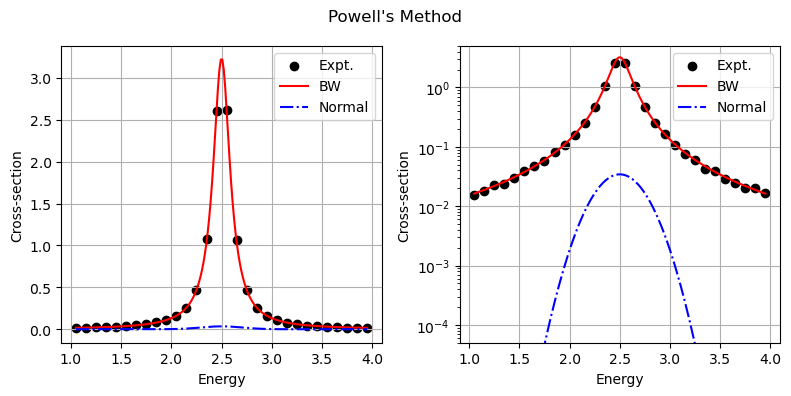

In [9]:
def breit_wigner_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - breit_wigner(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

# Again, recast the function. The minimizer expects the parameter
# vector as the only argument of the function.
recast_func = lambda p: breit_wigner_chi(en, f, f_sd, p)
min_result = optimize.minimize(recast_func, x0=[2.5,0.1,0.1], method="Powell")
print(f"For BW: {min_result}")


def gauss_model_chi(x_data, y_data, sigma_vals, param_vec):
    numer = y_data - gauss_model(x_data, param_vec)
    denom = sigma_vals
    return np.sum((numer/denom)**2) # Sum of each num/denom squared

recast_func_g = lambda p: gauss_model_chi(en, f, f_sd, p)
min_result_g = optimize.minimize(recast_func, x0=[2.5,0.1,0.1], method="Powell")
print(f"For Normal: {min_result_g}")


## Let's plot the same stuff again

fig, axs = plt.subplots(1, 2, figsize=(8,4))
e_span = np.linspace(min(en), max(en), 200)

for ax in axs:
    ax.scatter(en, f, color='black', label='Expt.')
    ax.set(xlabel="Energy", ylabel="Cross-section")
    ax.plot(e_span, breit_wigner(e_span, min_result.x), "r-", label="BW")
    ax.plot(e_span, gauss_model(e_span, min_result_g.x), "b-.", label="Normal")
    ax.legend()
    ax.grid(True)

lax, rax = axs
rax.set_yscale("log")
rax.set_ylim(5e-5, 5e-0)
plt.suptitle("Powell's Method")
plt.savefig("Powell's Method.png")
fig.tight_layout()